# Case Study 01 Supervised Learning

In [54]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [55]:
#reading the dataset
data=pd.read_csv(r"C:\Users\USER\Downloads\USA_Housing.csv")

In [56]:
#displaying first 5 rows
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [57]:
#basic information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [58]:
#checking for null values
data.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

No missing values in the dataset

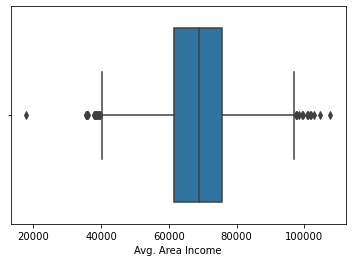

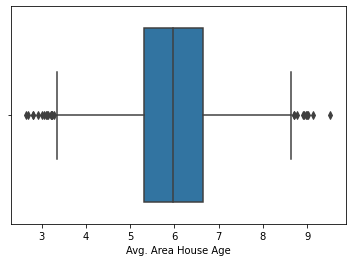

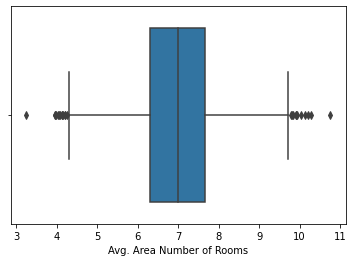

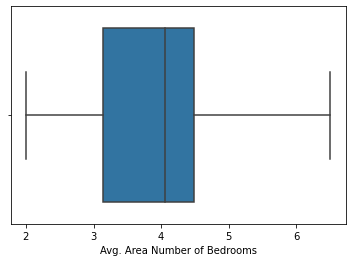

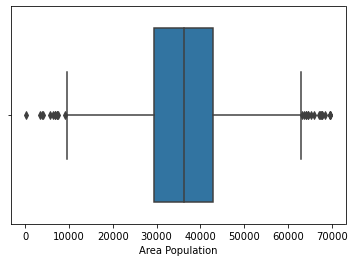

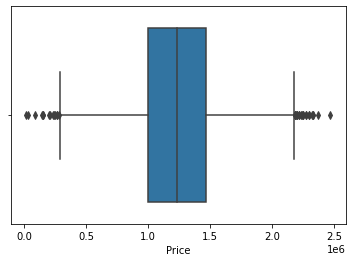

In [59]:
#Boxplot for outlier detection
for i in data.select_dtypes([np.float64,np.int64]):
    plt.subplots9figsize=(8,5)
    sns.boxplot(data[i])
    plt.show()

In [60]:
#outlier handling in data dataset
for j in data.select_dtypes(include =[np.float64,np.int64]):
    Q1 = data[j].quantile(0.25)
    Q3 = data[j].quantile(0.75)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    data[j].where(data[j] >=l_lim,l_lim, inplace=True)  
    data[j].where(data[j] <=u_lim,u_lim, inplace=True)  

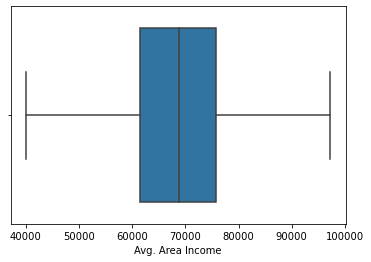

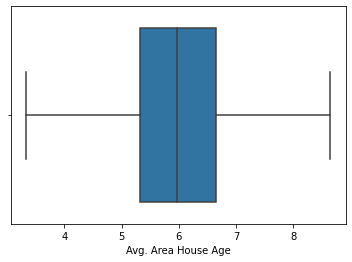

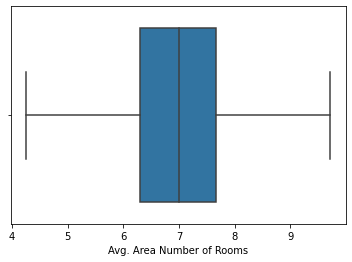

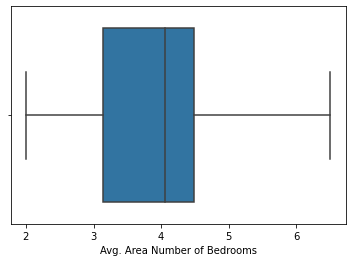

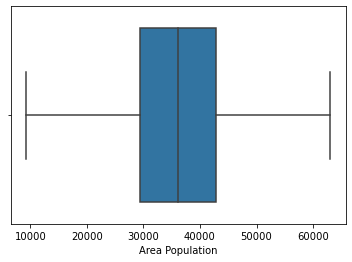

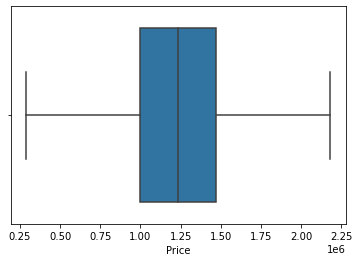

In [61]:
#Boxplot for outlier detection
for i in data.select_dtypes([np.float64,np.int64]):
    plt.subplots9figsize=(8,5)
    sns.boxplot(data[i])
    plt.show()

In [62]:
#Independent features
X=data.drop(['Address','Price'],axis=1)

In [63]:
#target feature
y=data['Price']

In [64]:
#statistical features of dataset
X.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,68585.636250,5.977490,6.987624,3.981330,36159.070769
std,10592.080045,0.986995,1.001847,1.234137,9862.221143
min,40026.397972,3.329495,4.249318,2.000000,9217.885601
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769
max,97237.503083,8.643597,9.715803,6.500000,63047.333870


In [65]:
#importing standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [66]:
#Scaling the data
X=ss.fit_transform(X)
X=pd.DataFrame(X)

In [67]:
#splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
#Importing regression algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [69]:
#initialising the regressor models
DTC = DecisionTreeRegressor(random_state=42)
lr = LinearRegression()
ri=Ridge()
la=Lasso()
RFC=RandomForestRegressor(n_estimators=100)
KNN = KNeighborsRegressor(n_neighbors=15)

In [70]:
algos=[DTC,lr,ri,la,RFC,KNN]
names=["Decision Tree Regressor","Linear Regression",'Ridge Regressor','Lasso Regressor','Random Forest Regressor','K Nearest Neighbor Regressor']

In [71]:
score=[]
for name in algos:
    name.fit(X_train,y_train)
    y_pred = name.predict(X_test)
    mse=round(mean_squared_error(y_pred,y_test),0)
    score.append(mse)

In [72]:
evaluation = pd.DataFrame({'Model': names,
                           'Mean squared error': score})

In [73]:
evaluation

,Model,Mean squared error
0,Decision Tree Regressor,3.101621e+10
1,Linear Regression,1.012591e+10
2,Ridge Regressor,1.012584e+10
3,Lasso Regressor,1.012590e+10
4,Random Forest Regressor,1.422344e+10
5,K Nearest Neighbor Regressor,1.493002e+10


Ridge regressor has the low mean squared error value. Linear regression and Lasso regression also have similarly low value

In [74]:
#prediction
DTC.fit(X_train,y_train)
round(DTC.predict([[68001.195261978,5.05751096303373,7.22893792228854,4.41,47116.0637993214]])[0])

2142897

#### Price of house with Avg. Area Income 68001.195261978 , Avg. Area House Age 5.05751096303373 , Avg. Area Number of Rooms  7.22893792228854 , Avg. Area Number of Bedrooms 4.41 , Area Population 47116.0637993214 is 2142897 